In [1]:
from used_packages import *
from utils import *

filename = "metadata.json"
with open(filename, 'r') as file:
    data = json.load(file)
    print('Dataset Metadata:')
print(json.dumps(data, indent=4))

Dataset Metadata:
{
    "@type": "dcat:Dataset",
    "accessLevel": "public",
    "contactPoint": {
        "@type": "vcard:Contact",
        "fn": "cocadmin",
        "hasEmail": "mailto:no-reply@data.cityofchicago.org"
    },
    "description": "This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Data Fulfillment and Analysis Division of the Chicago Police Department at DFA@ChicagoPolice.org.  Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parti

## Socioeconomic Community Snapshot Data from CSV file

In [2]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

path_css = 'data/comm_snapshot/CCA - Community_Data_Snapshots_2024_3269398054420983008.csv'
data_css = pd.read_csv(path_css, header=0)


## Crime Data from API

In [3]:
'''import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", "qX6sPDfNj5gT01n8nCW3uklAj")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)'''

'import pandas as pd\nfrom sodapy import Socrata\n\n# Unauthenticated client only works with public data sets. Note \'None\'\n# in place of application token, and no username or password:\nclient = Socrata("data.cityofchicago.org", "qX6sPDfNj5gT01n8nCW3uklAj")\n\n# Example authenticated client (needed for non-public datasets):\n# client = Socrata(data.cityofchicago.org,\n#                  MyAppToken,\n#                  username="user@example.com",\n#                  password="AFakePassword")\n\n# First 2000 results, returned as JSON from API / converted to Python list of\n# dictionaries by sodapy.\nresults = client.get("ijzp-q8t2", limit=2000)\n\n# Convert to pandas DataFrame\nresults_df = pd.DataFrame.from_records(results)'

## Crime Data from CSV file

In [4]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

path_crime = 'data/crime_data/Crimes_-_2001_to_Present.csv'
data_csv = pd.read_csv(path_crime, header=0)
data_csv = data_csv[data_csv['Year'] >= 2015]


In [5]:
print(f'Number of Districts: {len(np.unique(data_csv["District"]))}')
print(f'Number of Beats: {len(np.unique(data_csv["Beat"]))}')
print(f'Number of Community Areas: {len(np.unique(data_csv["Community Area"]))}')
print(f'Number of Wards: {len(np.unique(data_csv["Ward"]))}')
print(f'Unique Community Areas: {np.unique(data_csv["Community Area"])}')

Number of Districts: 24
Number of Beats: 275
Number of Community Areas: 78
Number of Wards: 51
Unique Community Areas: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. nan]


### Extracting geo coordinates of a random Community Area and confirming it aligns with Community Snapshot Data - Answer is Yes
### CA 77 is Edgewater in the snapshot dataset. Coords of CA 77 here all point to Edgewater on google maps

In [6]:
CA_no = 24
CA_coord = data_csv[data_csv['Community Area'] == CA_no][['Latitude', 'Longitude']]
CA_nan = data_csv[data_csv['Community Area'] == np.nan][['Latitude', 'Longitude']]
CA_0 = data_csv[data_csv['Community Area'] == 0][['Latitude', 'Longitude']]
print(f'Local Community Area [{CA_no}] - map coordinates: {CA_coord.values}')
print(f'Local Community Area [NaN] - map coordinates: {CA_nan.values}')
print(f'Number of Community Areas with 0 Labels (likely lying at the edge between CAs): {len(CA_0)}')
print(f'Local Community Area [0] - map coordinates: {CA_0.values}')

Local Community Area [24] - map coordinates: [[ 41.89850206 -87.69924242]
 [ 41.91065261 -87.66614577]
 [ 41.91096238 -87.69455985]
 ...
 [ 41.90846836 -87.67664595]
 [ 41.89519912 -87.66460973]
 [ 41.9033043  -87.67006468]]
Local Community Area [NaN] - map coordinates: []
Number of Community Areas with 0 Labels (likely lying at the edge between CAs): 0
Local Community Area [0] - map coordinates: []


In [7]:
CA = data_csv[['Longitude', 'Latitude', 'Community Area']]

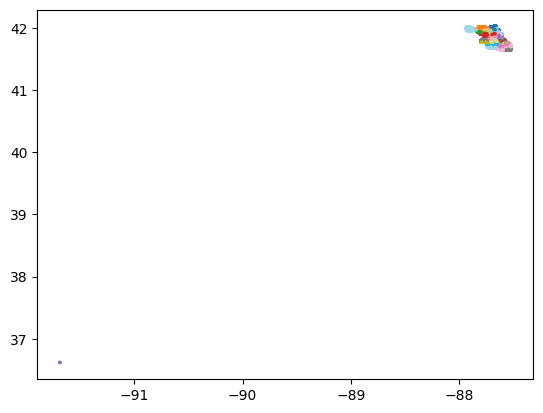

In [8]:
plt.scatter(CA.iloc[:,0], CA.iloc[:, 1], c=CA.iloc[:, 2], cmap='tab20', s=2)
plt.show()

### geo coords [36.619446395,-91.686565684] seems to be placeholder for unditentified coords. While some of these datapoints do not have Community Area specified, some do have valid CA label.


### Dropping those geo coords and replot

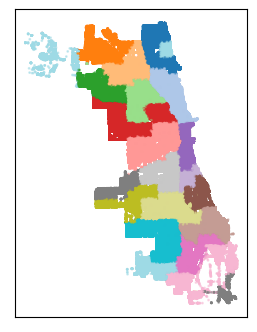

In [9]:
idx_geo_na = (CA['Longitude'] > -88)
plt.figure(figsize=(3, 4))
plt.scatter(CA[idx_geo_na].iloc[:, 0], CA[idx_geo_na].iloc[:, 1], c=CA[idx_geo_na].iloc[:, 2], cmap='tab20', s=1, alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.show()

https://chibarproject.com/wp-content/uploads/2021/09/Chicago-interactive-map-1.jpg

### Geo coords of crimes align with chicago map - colored by Community Area

In [10]:
print(data_csv.head(10))

          ID Case Number                    Date                      Block  \
1      25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2      26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3   13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4   13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   
6   13203321    JG415333  09/06/2023 05:00:00 PM           002XX N Wells st   
7   13582916    JH406913  07/01/2024 12:00:00 AM           102XX W ZEMKE RD   
8      28339    JH394658  08/25/2024 08:21:00 PM            033XX W OHIO ST   
9   13617993    JH453090  04/01/2024 12:00:00 AM         060XX S ALBANY AVE   
10  12651978    JF185322  03/24/2022 05:07:00 PM         012XX S WABASH AVE   
11  13210088    JG423627  08/31/2023 12:00:00 PM       023XX W JACKSON BLVD   

    IUCR         Primary Type  \
1   0110             HOMICIDE   
2   0110             HOMICIDE   
3   0620             BURGLARY  

In [11]:
data_csv.columns.tolist()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [12]:
data_csv['Date'] = pd.to_datetime(data_csv['Date'])
data_csv['Year'] = data_csv['Date'].dt.year
data_csv['Month'] = data_csv['Date'].dt.month
data_csv['Day'] = data_csv['Date'].dt.day
data_csv = data_csv.drop(columns=['Updated On', 'Date'])

cat_cols = ['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
            'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
            'Ward', 'Community Area', 'FBI Code']
data_csv[cat_cols] = data_csv[cat_cols].astype('category')

In [13]:
import json

categorical_cols = data_csv.select_dtypes(include=['object', 'category']).columns
unique_counts = {col: data_csv[col].nunique() for col in categorical_cols}
print('Number of unique values in categorical columns:')

print(json.dumps(unique_counts, indent=4))



Number of unique values in categorical columns:
{
    "ID": 2520001,
    "Case Number": 2519681,
    "Block": 38910,
    "IUCR": 389,
    "Primary Type": 35,
    "Description": 532,
    "Location Description": 201,
    "Arrest": 2,
    "Domestic": 2,
    "Beat": 275,
    "District": 23,
    "Ward": 50,
    "Community Area": 77,
    "FBI Code": 27,
    "Location": 459162
}


In [14]:
numerical_cols = data_csv.select_dtypes(include=['number']).columns
stats = data_csv[numerical_cols].describe().to_dict()

print(json.dumps(stats, indent=4))


{
    "X Coordinate": {
        "count": 2480727.0,
        "mean": 1164984.138825433,
        "std": 16349.213590355675,
        "min": 0.0,
        "25%": 1153334.0,
        "50%": 1166779.0,
        "75%": 1176589.0,
        "max": 1205119.0
    },
    "Y Coordinate": {
        "count": 2480727.0,
        "mean": 1886485.0936181208,
        "std": 31563.444899531252,
        "min": 0.0,
        "25%": 1859190.0,
        "50%": 1893159.0,
        "75%": 1909279.0,
        "max": 1951535.0
    },
    "Year": {
        "count": 2520001.0,
        "mean": 2019.410365313347,
        "std": 2.9259628459892677,
        "min": 2015.0,
        "25%": 2017.0,
        "50%": 2019.0,
        "75%": 2022.0,
        "max": 2025.0
    },
    "Latitude": {
        "count": 2480727.0,
        "mean": 41.844103399337776,
        "std": 0.08680505620300889,
        "min": 36.619446395,
        "25%": 41.768902738,
        "50%": 41.862520701,
        "75%": 41.906797102,
        "max": 42.022671246
  

In [15]:
data_train = data_csv[(data_csv['Year'] >= 2015) & (data_csv['Year'] <= 2022)]
print(f'Train - Number of crimes bertween 2015-2022 = {len(data_train):,}')
data_eval = data_csv[data_csv['Year'] > 2022]
print(f'Eval - Number of crimes bertween 2015-2022 = {len(data_eval):,}')
print(f'Training ration: {len(data_train) / (len(data_train) + len(data_eval)):.3}')

Train - Number of crimes bertween 2015-2022 = 1,996,238
Eval - Number of crimes bertween 2015-2022 = 523,763
Training ration: 0.792


In [16]:
data_train.head(10)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day
1,25953,JE240540,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,...,19.0,01A,1141387.0,1913179.0,2021,41.917838,-87.755969,"(41.917838056, -87.755968972)",5,24
2,26038,JE279849,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,...,13.0,01A,1152781.0,1941458.0,2021,41.995219,-87.713355,"(41.995219444, -87.713354912)",6,26
10,12651978,JF185322,012XX S WABASH AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,131,...,33.0,07,1176963.0,1894862.0,2022,41.866844,-87.625817,"(41.866843668, -87.625816668)",3,24
28,11662417,JC232642,009XX E 80TH ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,631,...,44.0,03,1184044.0,1852159.0,2019,41.749500,-87.601157,"(41.749500329, -87.6011574)",4,21
29,12218064,JD426642,011XX E 82ND ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,411,...,45.0,02,1185144.0,1850850.0,2020,41.745883,-87.597168,"(41.745882542, -87.597167639)",10,30
30,12342615,JE202211,081XX S PRAIRIE AVE,0325,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,631,...,44.0,03,1179448.0,1851073.0,2021,41.746626,-87.618032,"(41.746626309, -87.618031954)",4,17
31,12416972,JE293535,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,923,...,63.0,02,NaN,NaN,2020,NaN,NaN,NaN,10,1
33,12536164,JE439378,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,APARTMENT,False,True,923,...,63.0,02,NaN,NaN,2015,NaN,NaN,NaN,9,24
35,12592454,JF113025,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,...,68.0,26,1170805.0,1860170.0,2022,41.771782,-87.649437,"(41.771782439, -87.649436929)",1,14
36,12601676,JF124024,031XX W AUGUSTA BLVD,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1211,...,23.0,17,1155171.0,1906486.0,2022,41.899206,-87.705506,"(41.899206068, -87.705505587)",1,13


# Merge crime data with community snapshot CSS

Merge Community snapshot dataset with the crime data and group by community area

In [17]:
crimes_by_area = data_csv.groupby('Community Area')['ID'].count().reset_index()
crimes_by_area.columns = ['CA', 'Crime_Count']
crimes_by_area['CA'] = crimes_by_area['CA'].astype('int').astype('category')

# Merge with community data
merged_data = pd.merge(crimes_by_area, data_css,
                       left_on='CA',
                       right_on='GEOID',
                       how='left').drop('GEOID', axis=1)
comm_areas = {d['CA']: d['GEOG'] for _, d in merged_data.iterrows()}

# Create response variable
merged_data['Crime_Rate'] = merged_data['Crime_Count'] / merged_data['2020_POP'] * 1000
merged_data.columns.tolist()

['CA',
 'Crime_Count',
 'OBJECTID',
 'GEOG',
 '2000_POP',
 '2010_POP',
 '2020_POP',
 '2020_HH',
 '2020_HH_SIZE',
 'TOT_POP',
 'UND5',
 'A5_19',
 'A20_34',
 'A35_49',
 'A50_64',
 'A65_74',
 'A75_84',
 'OV85',
 'MED_AGE',
 'WHITE',
 'HISP',
 'BLACK',
 'ASIAN',
 'OTHER',
 'POP_HH',
 'POP_16OV',
 'IN_LBFRC',
 'EMP',
 'UNEMP',
 'NOT_IN_LBFRC',
 'TOT_WRKR16OV',
 'WORK_AT_HOME',
 'TOT_COMM',
 'DROVE_AL',
 'CARPOOL',
 'TRANSIT',
 'WALK_BIKE',
 'COMM_OTHER',
 'AGG_TT',
 'NO_VEH',
 'ONE_VEH',
 'TWO_VEH',
 'THREEOM_VEH',
 'POP_25OV',
 'LT_HS',
 'HS',
 'SOME_COLL',
 'ASSOC',
 'BACH',
 'GRAD_PROF',
 'INC_LT_25K',
 'INC_25_50K',
 'INC_50_75K',
 'INC_75_100K',
 'INC_100_150K',
 'INC_GT_150',
 'MEDINC',
 'INCPERCAP',
 'TOT_HH',
 'OWN_OCC_HU',
 'RENT_OCC_HU',
 'VAC_HU',
 'HU_TOT',
 'HU_SNG_DET',
 'HU_SNG_ATT',
 'HU_2UN',
 'HU_3_4UN',
 'HU_5_9UN',
 'HU_10_19UN',
 'HU_GT_19UN',
 'HU_MOBILE',
 'MED_ROOMS',
 'HA_AFT2010',
 'HA_90_10',
 'HA_70_90',
 'HA_40_70',
 'HA_BEF1940',
 'MED_HA',
 'BR_0_1',
 'BR_2',


In [18]:
# import CSS labels and group dictionaries. Manually created from CSS description pdf
from groups_and_vars import *

# features_keep are raw features from the CSS dataset that I decided to use to test the full raw model, I removed features that I thought were repetitive. This is just to have a benchamark against our engineered features.
features_keep, groups_dict_original, group_names_original = group_names_and_variables()

### Create full model and fit XGBoost model

In [19]:
from used_packages import *
from utils import *
merged_data_red = merged_data[features_keep]
X_gl = merged_data_red.drop(columns=['Crime_Count', 'CA', 'GEOG'])
y_gl = merged_data['Crime_Rate']

# remove language
reverse_group_names = {v: k for k, v in group_names_original.items()}
lang_features = [k for k, v in groups_dict_original.items() if reverse_group_names['Language'] == v]

X_gl = X_gl.drop(columns=lang_features)
X_train_gl, X_test_gl, y_train_gl, y_test_gl = train_test_split(X_gl, y_gl, test_size=0.2, random_state=42)

Default Model CV MAPE: 0.3468 ± 0.0681 (or 34.68% ± 6.81%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 2         | -0.3466   | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |
| 3         | -0.3453   | 0.6082    | 0.2913    | 8.827     | 145.6     | 0.6727    |
| 5         | -0.3377   | 0.8447    | 0.05045   | 5.045     | 214.9     | 0.7824    |
| 6         | -0.3294   | 0.8635    | 0.03192   | 5.057     | 214.8     | 0.8074    |
| 8         | -0.3275   | 0.8075    | 0.1498    | 5.092     | 214.6     | 0.8847    |
| 11        | -0.3087   | 1.0       | 0.01      | 4.911     | 214.5     | 1.0       |
| 22        | -0.3027   | 0.8265    | 0.02513   | 5.549     | 123.5     | 0.662     |

Best parameters:
colsample_bytree: 0.8264624273956631
learning_rate: 0.025125779338687974
max_depth: 6
n_estimators: 123
subsample: 

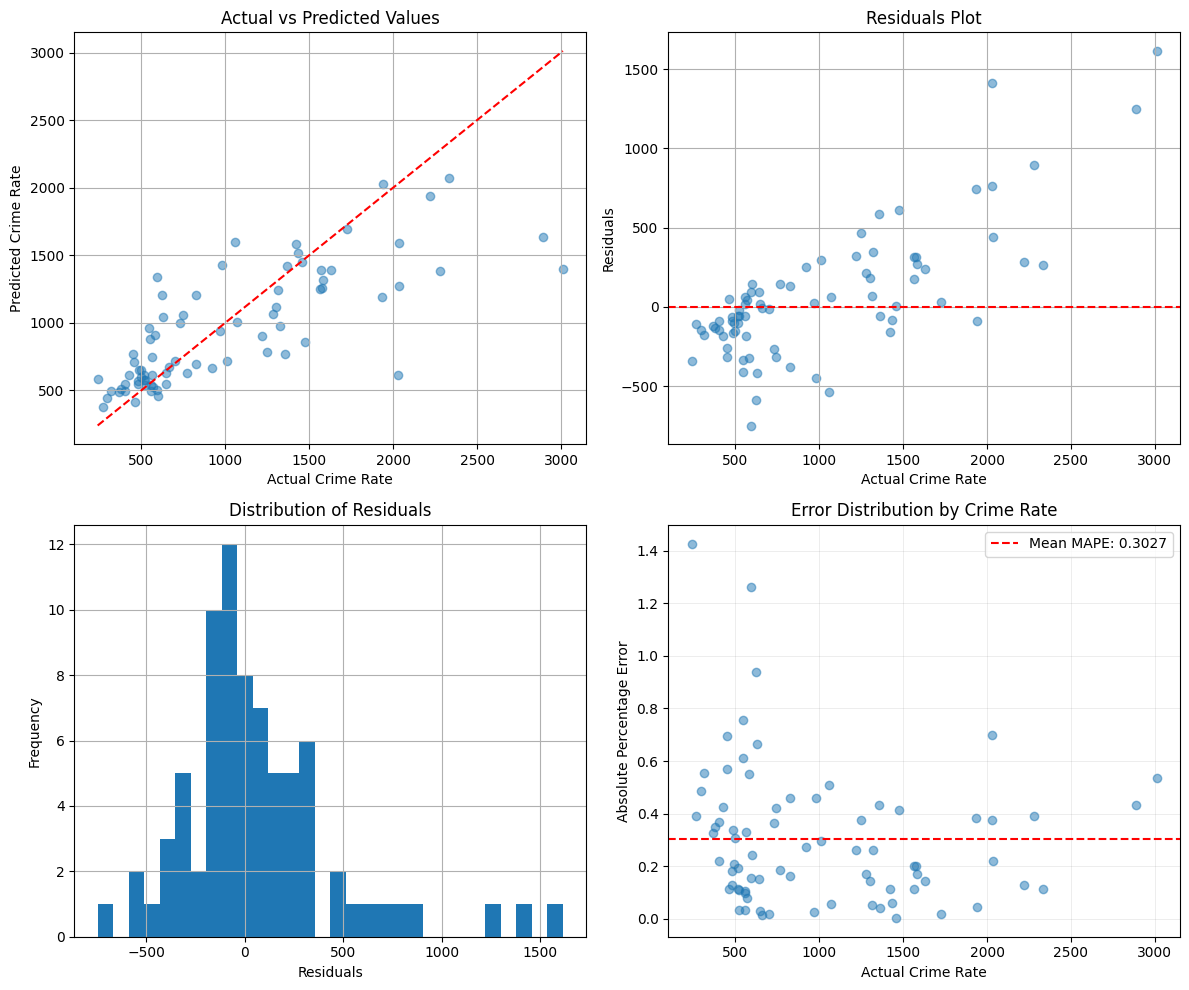

In [20]:
# XGB model using bayesian optimization for hyperparameter tuning
model_xg_full = xgboost_bayes(X_gl, y_gl, title='Raw Features', save_plot=True)

When trained on most variables, performance is poor, and Absolute Percentage Error is quite high for some states (fourth plot)

# Group Lasso on the full dataset

Original Labels
['Total Pop. 2020', 'Total Households 2020', 'Avg. Household Size 2020', 'Total Pop. 2022', 'Age Cohort', 'Employment Status', 'Mode of Travel to Work', 'Aggregate travel time to work', 'Vehicles Available', 'Education', 'Household Income', 'Household Occupancy', 'Housing Type', 'Housing Size', 'Housing Age', 'Home Value', 'Rent', 'Household PC & Net Access', 'Disability No.', 'Disability by Type', 'Disability by Age', 'Avg. Vehicles Miles', 'General Land Use', 'Household Size', 'Household Type', 'Nativity']

Group Numbers
[0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 25, 25]

(48, 112)
1/150 lambda: 1.00e+01 - MAP

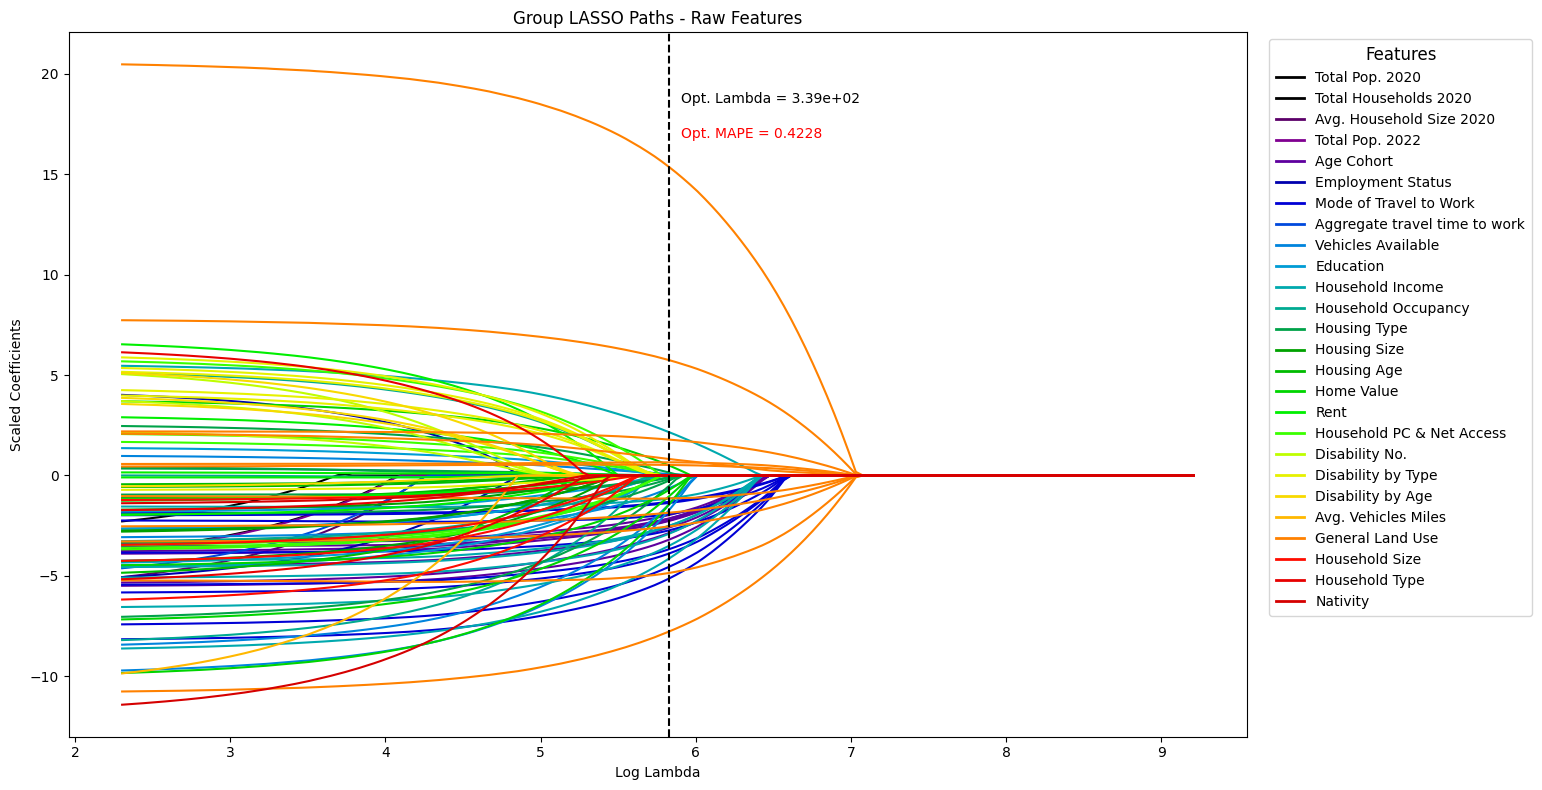

In [21]:
l1_reg = 0.001 #np.linspace(0,0.1,100)
title = f'Group LASSO Paths - Raw Features'
model_gl, coefs_gl, lam_gl, ypred_gl, feature_names_gl, group_names_gl, _, best_selected_features_gl = (
    glasso_paths(X_train_gl, y_train_gl, X_test_gl, groups_dict_original, group_names_original,
                 c_start=1, c_stop=4, c_num=150,
                 scoring='neg_mean_absolute_percentage_error',
                 l1_reg=l1_reg,
                 n_iter=50,
                 tol=1e-3,
                 cmap='nipy_spectral',
                 title=title,
                 verbose=True,
                 save_plot=True))

It's clear many coefs are driven to zero. Below is the coef analysis.

### Coef Analysis on top Group-Lasso predictor groups - Coefs sorted in descending order based on the mean of the absolute valute value of the group coefs

#### If we include Language variables, Language would be the top coef group, and the model performance is much better , but we can't keep it.

In [22]:
group_lasso_analysis = coef_analysis(X_train_gl, coefs_gl, feature_names_gl, group_names_gl)
group_lasso_analysis

,group_name,mean_abs_coef,mean_coef,total_features,selected_features,group
0,General Land Use,3.914,0.613,11,11,32
1,Mode of Travel to Work,3.074,-3.074,8,8,13
2,Household Income,2.699,-2.081,7,7,18
3,Age Cohort,2.429,-2.429,8,8,8
4,Vehicles Available,0.977,-0.940,4,4,15
5,Home Value,0.934,-0.683,4,4,23
6,Housing Type,0.169,-0.131,8,8,20
7,Total Pop. 2020,0.000,0.000,1,0,4
8,Rent,0.000,0.000,6,0,24
9,Household Type,0.000,0.000,3,0,34


Only 6 groups selected

Default Model CV MAPE: 0.3572 ± 0.0961 (or 35.72% ± 9.61%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 2         | -0.3794   | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |
| 3         | -0.3761   | 0.6082    | 0.2913    | 8.827     | 145.6     | 0.6727    |
| 4         | -0.3493   | 0.6734    | 0.09823   | 6.673     | 244.4     | 0.7165    |
| 11        | -0.347    | 0.8571    | 0.1069    | 6.394     | 244.7     | 0.6346    |
| 15        | -0.3423   | 0.6534    | 0.2238    | 5.109     | 135.3     | 0.6907    |
| 22        | -0.328    | 0.8265    | 0.02513   | 5.549     | 123.5     | 0.662     |

Best parameters:
colsample_bytree: 0.8264624273956631
learning_rate: 0.025125779338687974
max_depth: 6
n_estimators: 123
subsample: 0.6619695861244522

Best Model CV MAPE: 0.3280 ± 0.0356 (or 32.80% ± 3.56%)
Improvemen

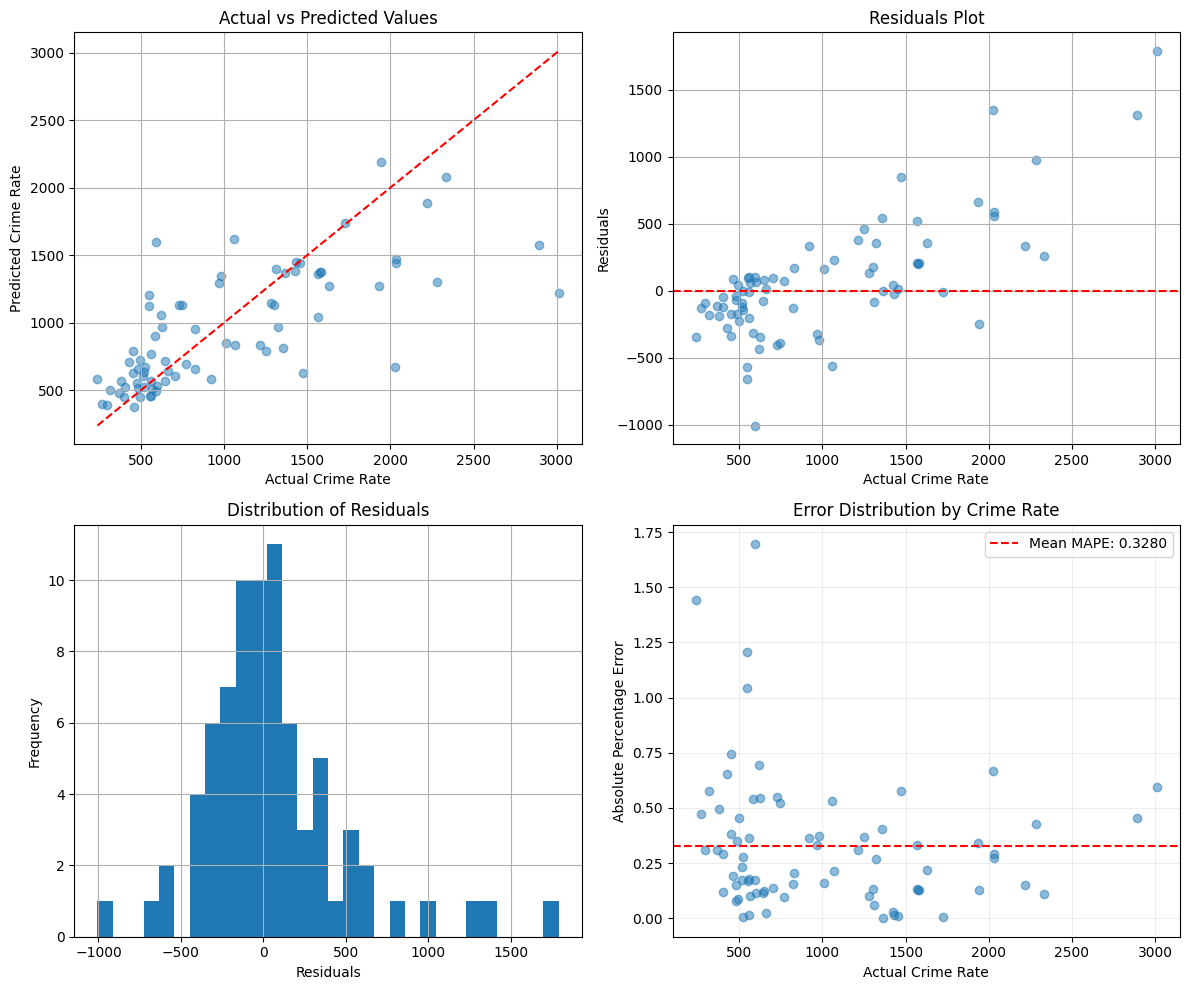

In [23]:
model_xg_gl = xgboost_bayes(X_gl.iloc[:, best_selected_features_gl], y_gl, title='Lasso selected raw features', save_plot=True)

Performance after group lasso slightly worse. The problem is not high dimensionality, it's the features themselves and potentially high multicollinearity.

# Import engineered features
### Engineered features seem more interpretable and useful. All created from existing variables, No PCA
### I included a hight number, I then used Lasso, not Group-Lasso.

In [24]:
distilled_df = create_distilled_features(merged_data)

In [25]:
X_l = distilled_df
y_l = merged_data['Crime_Rate']

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.2, random_state=42)

### run xgboost model on the full set of engnineered features

Default Model CV MAPE: 0.2518 ± 0.0341 (or 25.18% ± 3.41%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 8         | -0.2365   | 0.8336    | 0.02386   | 3.251     | 97.04     | 0.6933    |
| 12        | -0.2318   | 0.6302    | 0.2455    | 6.267     | 187.6     | 0.7195    |

Best parameters:
colsample_bytree: 0.6301857357366749
learning_rate: 0.24545217760350427
max_depth: 6
n_estimators: 188
subsample: 0.7194990574673508

Best Model CV MAPE: 0.2318 ± 0.0484 (or 23.18% ± 4.84%)
Improvement over baseline: 7.94%

Top 5 feature importances:
                    Feature  Importance
68              rent_burden    0.572653
29             vacancy_rate    0.192591
75  economic_vitality_index    0.033977
28              rental_rate    0.026256
49   senior_disability_rate    0.023672


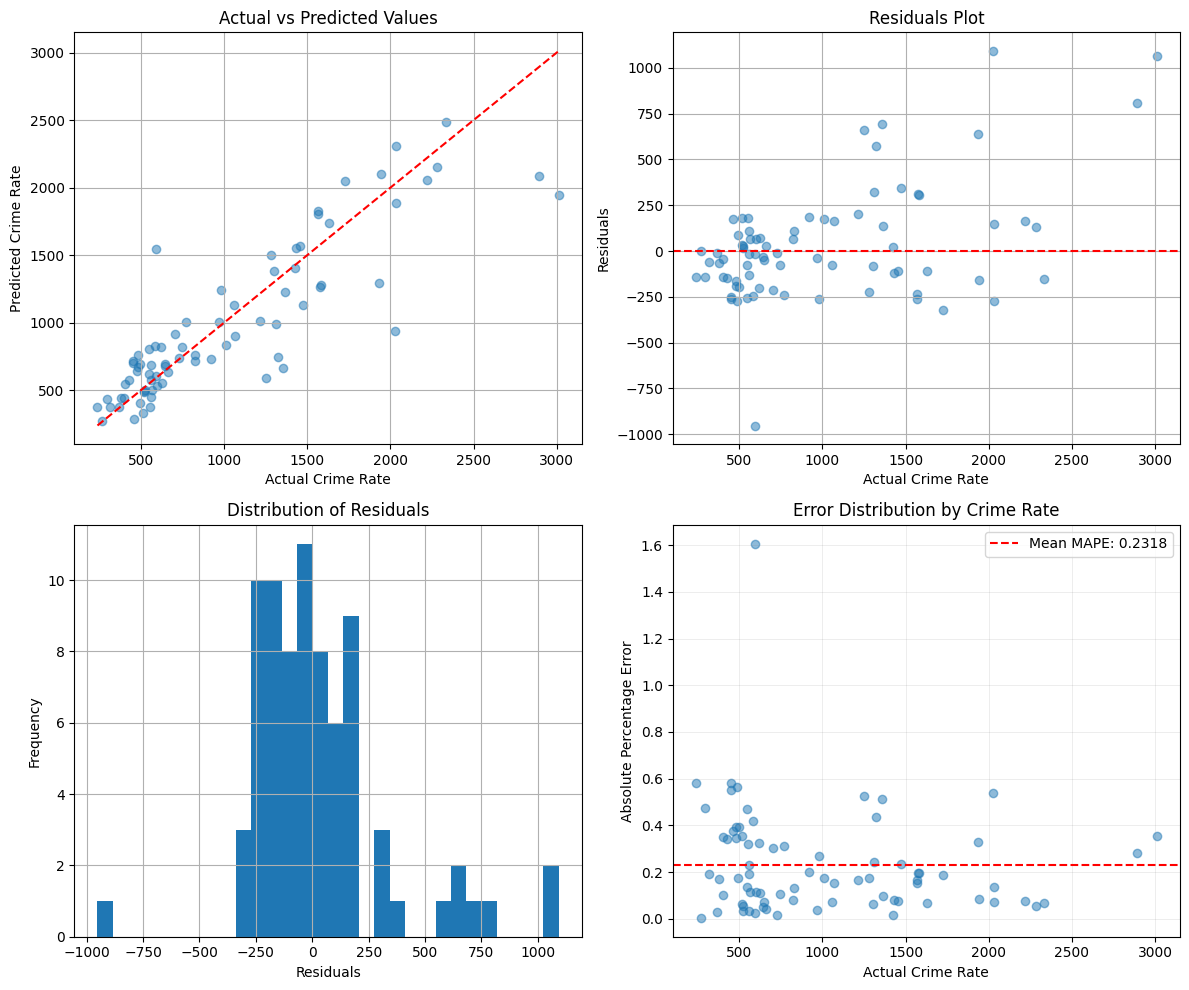

In [26]:
model_xg_engineered = xgboost_bayes(X_l, y_l, title='egnineered features', save_plot=True)


The overall performance is not as bad the the full set of raw variables, however, we still have very high Absolute Percentage Error exceeding 100% (only one CA)

### Perform Lasso on the engineered features

Original Labels
['recent_population', 'avg_household_size', 'median_age', 'age_dependency', 'youth_ratio', 'senior_ratio', 'diversity_index', 'largest_demo_pct', 'hh_population_ratio', 'employment_rate', 'unemployment_rate', 'labor_participation', 'transit_use_rate', 'work_from_home_rate', 'car_commute_rate', 'active_commute_rate', 'avg_commute_time', 'car_ownership_rate', 'multi_car_rate', 'zero_car_rate', 'higher_education_rate', 'hs_completion_rate', 'college_exposure_rate', 'median_income', 'income_per_capita', 'high_income_pct', 'low_income_pct', 'homeownership_rate', 'rental_rate', 'vacancy_rate', 'single_family_pct', 'small_multifamily_pct', 'large_multifamily_pct', 'median_rooms', 'large_homes_pct', 'small_homes_pct', 'median_home_age', 'new_housing_pct', 'old_housing_pct', 'median_home_value', 'high_value_homes_pct', 'median_rent', 'high_rent_pct', 'rent_to_income', 'internet_access_rate', 'broadband_rate', 'digital_divide_rate', 'disability_rate', 'youth_disability_rate', 'se

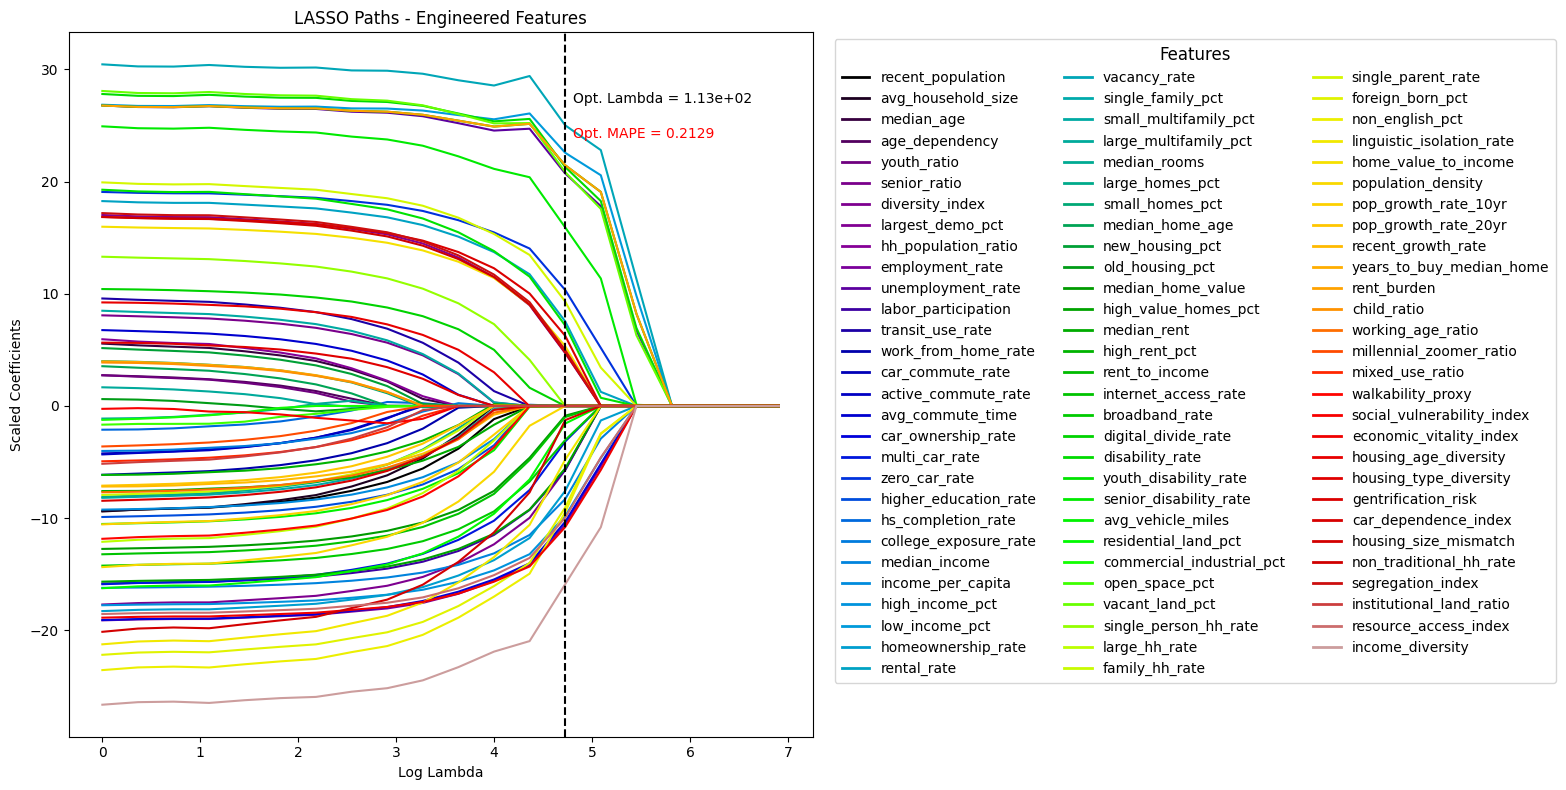

In [27]:
l1_reg = 0.1 #np.linspace(0,0.1,100)
title = f'LASSO Paths - Engineered Features'
model_l, coefs_l, lam_l, ypred_l, feature_names_l, group_names_l, _, best_selected_features_l = (
    glasso_paths(X_train_l, y_train_l, X_test_l,
                 c_start=0, c_stop=3, c_num=20,
                 scoring='neg_mean_absolute_percentage_error',
                 l1_reg=l1_reg,
                 n_iter=50,
                 tol=1e-3,
                 cmap='nipy_spectral',
                 title=title,
                 verbose=True,
                 no_groups=True,
                 save_plot=True,
                 show_nonzero_only=False))

I created many features, however, lasso seems to be very effective in driving many of them to zero, and the performance is in the 20%.

In the group lasso function above, you can choose show_nonzero_only=True to only display the paths of the non-zero coefs of the best model.

Also notice that no_groups=True is used to indicate we are NOT using Group-Lasso.

In [28]:
lasso_analysis_engineered_l = coef_analysis(X_train_l, coefs_l, feature_names_l, group_names_l)
lasso_analysis_engineered_l

,group_name,mean_abs_coef,mean_coef,total_features,selected_features,group
0,vacancy_rate,25.007,25.007,1,1,30
1,low_income_pct,22.560,22.560,1,1,27
2,rent_to_income,21.450,21.450,1,1,44
3,rent_burden,21.450,21.450,1,1,69
4,disability_rate,21.291,21.291,1,1,48
...,...,...,...,...,...,...
81,youth_ratio,0.000,0.000,1,0,5
82,avg_vehicle_miles,0.000,0.000,1,0,51
83,commercial_industrial_pct,0.000,0.000,1,0,53
84,open_space_pct,0.000,0.000,1,0,54


36 out of 77 features chosen - Not bad. Let's fit an XGBoost model on them

Default Model CV MAPE: 0.2413 ± 0.0233 (or 24.13% ± 2.33%)
Starting Bayesian optimization...
|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 2         | -0.2485   | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |
| 3         | -0.2404   | 0.6082    | 0.2913    | 8.827     | 145.6     | 0.6727    |
| 13        | -0.2243   | 0.6309    | 0.1808    | 9.018     | 320.5     | 0.8724    |

Best parameters:
colsample_bytree: 0.6308547548392659
learning_rate: 0.1807997402055997
max_depth: 9
n_estimators: 320
subsample: 0.8724118983959281

Best Model CV MAPE: 0.2243 ± 0.0324 (or 22.43% ± 3.24%)
Improvement over baseline: 7.05%

Top 5 feature importances:
                    Feature  Importance
16           rent_to_income    0.253997
29              rent_burden    0.208796
30  economic_vitality_index    0.189440
13             vacancy_rate    0.162415
9        

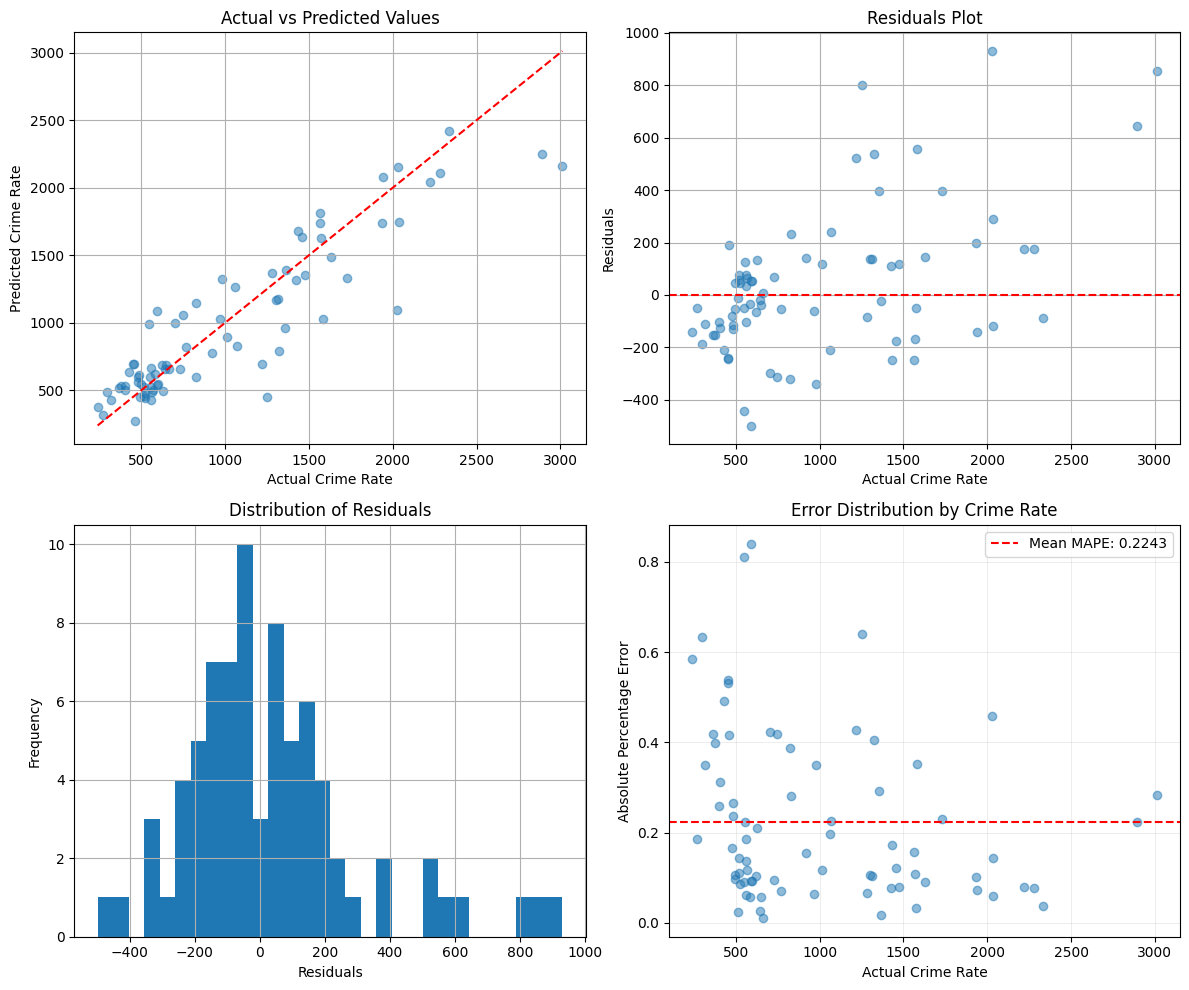

In [29]:
model_xg_engineered_l = xgboost_bayes(X_l.iloc[:, best_selected_features_l], y_l, title='Lasso selected egnineered features', save_plot=True)


MAPE improved as well as stdv of the Absolute percentage error. The highest is slightly above 80%, much improved from the 160% we had.

We have a set of highly predictive variables chosen by lasso, which only captures the linear patterns in the data - it's still good though because the lasso performance (which is measured on a ridge model, ie, we use lasso to select features, but fit a ridge modlel to measure performance) is comparable to that of the xgboost, although not obtained with the same robustness as xgboost (not cross validated, which usually decreases performance).

We also have the most important features determined by xgboost model, which captures non-linear patterns. We can work off these sets of variables